# "A Revolution in the Golden Age": A Compuational Analysis of Character,  Environment, Plot


## Ziyi Wang

Instructions: 

1. Replace "yourname" in the title of this notebook, and "your name here" in the markdown above, with your name.
2. Create a title for your final project. Preferably, this should indicate what your argument is. Replace "your title here" in the markdown above with your title.
3. Write your paper, and include everything (your prose in Markdown, your code, and your figures) in this notebook. Don't include the texts you're analyzing. If you generated your corpus programmatically (i.e. using corpus-db.org or some fancy Python), maybe you'll want to include that in the code somewhere here. Your notebook file (`.ipynb`) will be the only thing you turn in.  
3. Annotate your code using markdown cells, and/or comment lines (lines beginning with `#`), explaining why you're doing what you're doing. If one of your functions takes certain parameters, for instance, why did you choose those parameters? 
3. Prune your notebook of unnecessary or redundant code. Run all your code again, to show that it works as-is. Each code cell should have a number in it, and an output, if applicable. 
4. Proofread well! If English is not your first language, you might consider making an appointment with [the Writing Center](https://slc.berkeley.edu/appointment-service) to get help polishing the language of your paper. At minimum, you'll want to use a spell checker and maybe even an automatic grammar-checking service like [Grammerly](https://www.grammarly.com/). (Of course, you now have the tools to analyze your own writing, if you want. You can get your markdown text into Python by adapting the word count function below, and use it to analyze your most frequent n-grams!) You might also consider organizing a mutual editing session with classmates.
4. Ensure that you have no more than three plots (figures). One figure with several subplots is OK, and counts as one figure.
4. If you quote from or reference literary works, or works of criticirm, provide in-text parenthetical citations. Then create a bibliographic entry for each work you cite, and include them at the end. Unless your discipline requires a different format, use [MLA Style](https://style.mla.org/) as the format for your bibliography, and title it "works cited." 
4. Replace the value of the `filename` variable in the wordcount cell below to the name your file. (E.g., `Jonathan-Final.ipynb`.) Then run the wordcount cell. Ensure that your paper is between 1000 and 2000 words, so it doesn't give you any errors or warnings.  
5. Optionally, and for a 5% bonus, add your notebook to the `/Projects` directory of the course repository, and submit it as a pull request. Your project will then become public. 
6. Email me your `.ipynb` file: jonathan.reeve@columbia.edu. Please email me only your `.ipynb` file, alone and uncompressed. Please don't respond to an existing email, but create a new email, with the subject: `Yourname: Final Project`, replacing `yourname` with your name. Do this regardless of whether you also submit a pull request. 
7. Celebrate! You've finished your final project, and gloriously completed _Introduction to Computational Literary Analysis_!

In [1]:
# Import all your libraries here, and only here, please.
import spacy
from collections import Counter
import pandas as pd
import numpy as np
from nltk import word_tokenize as tokenize
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import macroetym
from macroetym import main
import os
from textblob import TextBlob
import pickle
# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current
# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
from wordcloud import WordCloud   #词云库
plt.rcParams['figure.figsize'] = [10, 6]

/Users/wzy/anaconda3/lib/python3.6/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/Users/wzy/anaconda3/lib/python3.6/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


## 1 Background 
To begin with, we will provide a brief background on the development of detective novel. Many litterateurs suppose that the history of the detective novel can be divided into three stages. The first stage is from 1841 to 1911, which is the early stage of the detective novel. The second stage is from 1912 to 1945, which It is also called The Golden ages. Ellery Queen John Dickson Carr and Agatha Christie are the three most famous writer of this period, they are also called “The big three”. The detective novel in the first two periods is regarded as the classical detective novel, while the detective novel in the third period is commonly called hard-boiled detective novel.
<br><br>
The Golden Age of classical detective fiction is one of the most important phases in the development of detective novels. It is different from the early detective novel. Therefore, the paper makes a detailed discussion about the difference between the early detective novel and the golden age detective novel from the perspective of 
the figures, the environment and plot which are the three most necessary element in a novel. 

## 2 Corpus


Due to the limitation of the computer memory, only four early detective and golden age detective novel are included in the corpus, but they are all the typical novel which are distinctively characteristic of their period. Selection rules are as follow:
- are more than 50000 words
- are included in “Julian Symons Top 100 Crime and Mystery Novels”
- are not the novel in the transitional period




In [2]:
def file_name(file_dir,file_type):   
#Get all txt file
    L=[]   
    for root, dirs, files in os.walk(file_dir):  
        for file in files:  
            if os.path.splitext(file)[1] == file_type:  
                # L.append(os.path.join(root, file))  
                file_name = file[0:-4]  #去掉.txt
                L.append(file)  
    return L

In [3]:
#Get file name
file_dir='new_corpus/'
file_type='.txt'
file_list=file_name(file_dir,file_type)
first_list=[file for file in file_list if file[0]=='1']
second_list=[file for file in file_list if file[0]=='2']

In [4]:
file_name1=[file[:-4] for file in first_list]
file_name2=[file[:-4] for file in second_list]

In [5]:
pd.DataFrame([file_name1,file_name2]).T

,0,1
0,1The Hound of the Baskervilles,2The Pit Prop Syndicate
1,1The Moonstone,2The Three Coffins
2,1The Mystery of a Hansom Cab,2Murder Of Roger Ackroyd By Agatha Christie
3,1The Mystery of Orcival,2The Greek Coffin Mystery


## 3 Character
Hypothesis:
- the golden age detective novel pay more effort to character creation.
- the major character image of the golden age detective novel is more rational than that of the early detective novel.

The vivid character is the main features of the golden age. Compared to the early detective novel, the writers in the golden age paid more attention to Character creation and gave a vivid description of many distinctive characters. Ellery, the major character of The Greek Coffin Mystery, gives the reader a strong impression because of his frankness and talent. Meanwhile, Agatha Christie’s Poirot and John Dickson Carr’s Dr. Fell all become a well-known public hero. This part discusses the character image and Character creation method in the golden age.<br><br>
Speaking of the character image, the major character who are in the golden age detective novel has similar features. They tend to find out the criminal through logical reasoning, science, and psychoanalysis. In the majority of the golden age detective novel, the detective will give the very careful process of reasoning, which can reassure the reader. While the original novel commonly figures out the truth by accident or the intuition of the detective. A typical example is that Cuff(the detective in _The Moonstone_) write the criminal’s name on one envelope. In the end, his judgment is correct, but he did not give any interpretation of his judgment. 

### 3.2 Computational analysis

### 3.2.1 Analysis process

![Aaron Swartz](https://raw.githubusercontent.com/wangziyi2016/Text-analize/master/process.png)

#### 3.2.2 Preparatory work

In [6]:
def cutoverlenth(label_list,text_list):
#Sometimes the novel is too long for Spacy, so I cut it into two parts
    new_label=[]
    new_text=[]
    for (j,i) in zip(label_list,text_list):
        if len(i)>1000000:
            new_text.append(i[:500000])
            new_text.append(i[500000:])
            new_label.append(j[:-4]+str(1)+j[-4:])
            new_label.append(j[:-4]+str(2)+j[-4:])
        else:
            new_text.append(i)
            new_label.append(j)
    return new_label,new_text

Read the text from my computer

In [7]:
#read the txt file
target_text1=[open(file_dir+file).read() for file in first_list]
target_text2=[open(file_dir+file).read() for file in second_list]
target_text3=[open(file_dir+file).read() for file in file_list]

Sometimes the novels are too long for Spacy, so I cut them into two parts

In [8]:
spacy_list2,spacy_text2=cutoverlenth(second_list,target_text2)
spacy_list1,spacy_text1=cutoverlenth(first_list,target_text1)

Transforming string to nlp data structure can cost a lot of time, So I save it as pkl file, and I only need to reload them every times I want to use them.

In [9]:
nlp = spacy.load('en') 

In [10]:
#function nlp() can costs large amout of time, So I save it.
dr='new_corpus/'
nlp1=[]
for name in spacy_list1:
    pkl_file = open(dr+name[:-4]+'.pkl', 'rb')
    data1 = pickle.load(pkl_file)
    pkl_file.close()
    nlp1.append(data1)

In [11]:
nlp2=[]
for name in spacy_list2:
    pkl_file = open(dr+name[:-4]+'.pkl', 'rb')
    data1 = pickle.load(pkl_file)
    pkl_file.close()
    nlp2.append(data1)

#### 3.2.3 Select the sentences that contain character's name and count _the character ratio_
To focus on the major character creation, the First step is to find the words that related to the major character. We list all the major character's name and go through every sentence to select the sentences that contain a major character's name. Secondly, I create a ratio index to measure how much sentences the writer spend on the major character. The definition is as follow：
$$ R_{c}=\frac{n}{N}$$
where n and N denote the number of sentences that contain the name of the character and the total number of the sentences, respectively.

In [12]:
def select_name(text1,name_list):
#Find the sentence that contains the major character's name
    sent_list=nltk.sent_tokenize(text1)
    name_sentence=[]
    for sent in sent_list:
        for name in name_list:
            if name in sent:
                name_sentence.append(sent)
                break
    return len(name_sentence)/len(sent_list),name_sentence

Form a dictionary of the name of major charachter

In [13]:
name_lists1={'1The Hound of the Baskervilles':['Holmes'],
            "1The Moonstone":['Cuff','Sergeant'],
            "1The Mystery of a Hansom Cab":['Calton'],
            "1The Mystery of Orcival":['Lecoq']}
name_lists2={"2The Pit Prop Syndicate":['Merriman']
             ,"2The Greek Coffin Mystery":['Ellery'],
             "2Murder Of Roger Ackroyd By Agatha Christie":['Poirot'],
             "2The Three Coffins":['Dr','doctor','Fell']}

Count the character ratio


In [14]:
ratio1=[]
t_list1=[]
for (file_name,text1) in zip(first_list,target_text1):
    name=name_lists1[file_name[0:-4]]
    ratio,name_list=select_name(text1,name)
    ratio1.append(ratio)
    t_list1.append(name_list)



In [15]:
ratio2=[]
t_list2=[]
for (file_name,text2) in zip(second_list,target_text2):
    name=name_lists2[file_name[0:-4]]
    ratio,name_list=select_name(text2,name)
    ratio2.append(ratio)
    t_list2.append(name_list)




In [16]:
def ratio_dic(file_list,ratio_list):
    ratio_dic={}
    for name,ratio in zip(file_list,ratio_list):
        ratio_dic[name[0:-4]]=ratio
    return ratio_dic

Plot the character ratio in different period 

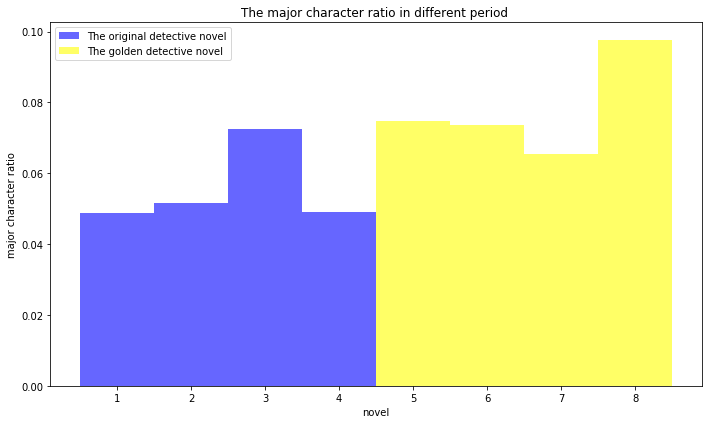

In [17]:
x1=np.linspace(1,len(first_list),len(first_list))
x2=np.linspace(len(first_list)+1,len(first_list)+len(second_list),len(second_list))
plt.bar(x1,ratio1,1, color="blue",alpha=0.6,label='The original detective novel')  
plt.bar(x2,ratio2,1, color="yellow",alpha=0.6,label='The golden detective novel')  
plt.xlabel("novel")  #设置X轴Y轴名称  
plt.ylabel("major character ratio")  
plt.title("The major character ratio in different period ")
plt.legend()
plt.tight_layout()
plt.show()

##### Analysis:

As is shown in the chart, the character ratio in the golden age detective novel is strictly higher than that of the original detective novel. It verifies the first hypothesis that the golden age detective novel spends more effort on the character creation.


#### 3.2.4Find the keywords of the major character
The adjective and adverb are the significant words to the character's feature. I try to use the tree sentence model to find the children of characters' name, but the sentence structure in the detective novel is too difficult for Spacy to analyze. So I choose a simpler way to solve this problem. I pick out all the adjective and adverb in the sentences that contain a major character's name. However, the selected words are too much and too complicated to analyze. I classify the words into many groups by clustering analysis and find the central words to be the keywords of the major character

In [18]:
def adjectives_around_characters(sents,stop_list):
    #Find the adjectives and adverbs around the major character
    word_list = []
    vector_list= []
    for sent1 in sents: 
        sent=nlp(sent1)
        for word in sent:
            #print(word,word.pos_)
            if word.pos_ in ['ADJ','ADV']: 
                if word.text.lower() not in stop_list :
                    vector_list.append(word.vector)
                    word_list.append(word.string)
    return word_list,vector_list

In [19]:
def k_cluster(vector_list,n_clusters1=10,random_state=1):
    #Set up the k-mean cluster model
    data = np.array(vector_list) 
    estimator = KMeans(n_clusters=n_clusters1,random_state=random_state)#构造聚类器
    estimator.fit(data)
    centroids = estimator.cluster_centers_ 
    label_pred = estimator.labels_ 
    return label_pred,centroids

In [20]:
def find_centeral_words(centroids,word_list,vector_list):
    '''Find the word whose word vector is the most similar to the 
    center of clustering'''
    mind=100
    index1=0
    index_list=[]
    for center in centroids:
        mind=100
        i=0
        for vector1 in vector_list:
            delta=vector1-center
            a=np.dot(delta,delta)
            if mind>a:
                mind=a
                index1=i
            i+=1
        index_list.append(index1)
    central_word=[word_list[index1] for index1 in index_list]
    return central_word
        

#### Load stop words

In [21]:
stop_words=open('stop_words.txt').read()
stop_list= stop_words.split('\n')

In [22]:
cluster_rate=60

In [23]:
keywords_dic1={}
for (file_name,t_sent) in zip(first_list,t_list1):
    name=name_lists1[file_name[0:-4]]
    word_list,vector_list=adjectives_around_characters(t_sent,stop_list)
    n_clusters=int(len(vector_list)/cluster_rate)
    if n_clusters<8:
        n_clusters=8
    label_list,centroids=k_cluster(vector_list,n_clusters,3)
    central_word=find_centeral_words(centroids,word_list,vector_list)
    keywords_dic1[name[0]]=central_word

In [24]:
keywords_dic2={}
for (file_name,t_sent) in zip(second_list,t_list2):
    name=name_lists2[file_name[0:-4]]
    word_list,vector_list=adjectives_around_characters(t_sent,stop_list)
    n_clusters=int(len(vector_list)/cluster_rate)
    if n_clusters<8:
        n_clusters=8
    label_list,centroids=k_cluster(vector_list,n_clusters,6)
    central_word=find_centeral_words(centroids,word_list,vector_list)
    keywords_dic2[name[0]]=central_word

##### Put the keywords into DataFrame

In [25]:
def same_lenth(tar_dic):
#make every list in the dictionary same lenth
    maxlenth=max([len(tar_dic[words]) for words in tar_dic])
    for name in tar_dic:
        words=tar_dic[name]
        lenth=len(words)
        if lenth<maxlenth:
            num=maxlenth-lenth
            for i in range(num):
                words.append(' ')
            tar_dic[name]=words   
    return tar_dic

In [26]:
def color_yellow1(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    target_list=['dramatic ','persistent ']
    color = 'yellow' if val in target_list else 'white'
    return 'background-color: %s' % color


In [27]:
def color_yellow2(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    target_list=['scientific ','forcibly']
    color = 'yellow' if val in target_list else 'white'
    return 'background-color: %s' % color



#### The keywords for the major character in the original detective novel

In [28]:
pd.DataFrame(same_lenth(keywords_dic1)).style.applymap(
    color_yellow1)

,Calton,Cuff,Holmes,Lecoq
0,actual,equal,congenial,True
1,guilty,odd,dramatic,friendly
2,dead,evergreen,infrequent,pretentiously
3,dead,true,observed,satisfied
4,persistent,right,curious,useless
5,anxious,melancholy,infrequent,vague
6,dead,comforting,dramatic,humble
7,desirous,capable,darting,satisfied


#### The keywords for  the major character in the golden age detective novel

In [29]:
pd.DataFrame(same_lenth(keywords_dic2)).style.applymap(
    color_yellow2)


,Dr,Ellery,Merriman,Poirot
0,retold,young,aback,unimportant
1,exactly,considerably,tired,young
2,Upstairs,young,suddenly,exactly
3,ruddy,violent,surprised,carefully
4,scary,blind,unexpected,nodded
5,Upstairs,violent,tired,busy
6,scientific,lazily,quiet,surprised
7,terrifying,trifle,quiet,thoughtfully
8,,cockier,cultured,
9,,interesting,annually,


##### Analysis:

There are many noticeable words. "scientific" is the keywords of Dr. Fell. He is a very knowledgeable person. He always finds out the criminal through some chemical or other scientific experiments. What's more, "forcibly" is the keywords of Ellery. He is famous for his strong logical reasoning ability. His reasoning makes readers convinced completely. They all find the criminal through reasoning or knowledge rather than intuition. However, the detective in the original novel behaves oppositely. The keywords for them are emotional and subjective. "Dramatic" indicates that the investigation of the detective contains contingency to some extent. The outcomes verified the second hypothesis.

#### 3.4.5 Sentimental analysis for the sentence that contains the name of the major character
To forth prove my hypothesis, I measure the subjectivity of the sentences through sentimental analysis.


In [30]:
def SA_sent_list(sent_list):
    blob = [TextBlob(sent) for sent in sent_list]
    out=[text.sentiment for text in blob]
    subjectivity_out=np.mean(np.array([i[0] for i in out]))
    return subjectivity_out

In [31]:
subjectivity_list1=np.array([SA_sent_list(sent_list) 
                        for sent_list in t_list1])
print('Average subjectivity of the original detective novel:'
      ,np.mean(np.array([SA_sent_list(sent_list) 
                        for sent_list in t_list1])))
subjectivity_list2=np.array([SA_sent_list(sent_list) 
                        for sent_list in t_list2])
print('Average subjectivity of the golden age detective novel:',np.mean(np.array([SA_sent_list(sent_list) 
                        for sent_list in t_list2])))


Average subjectivity of the original detective novel: 0.0545234453713
Average subjectivity of the golden age detective novel: 0.0408547590825


##### Analysis:

The average sujectivity of the golden age dtective novel is significantly lower than that of the earlier detective novel，which means the detective in the golden age investigate the case more objectively. It verified the second hypothesis from another aspect.

## 4 Environment 

Hypothesis:
- There is less scene change in the golden age detective novel.


I find that he golden age detective story often fell into the “country house” or “locked room” and other limited place. As a result, they have less scence change.

#### 4.1 Find place's name and count _the GPE ratio_
The scene change is always accompany by place change. So, I set a ratio index to measure the frequency of scene change. The defination is as follow：
$$ R_{G}=\frac{P}{Q}$$
where P and Q denote the number of GPE and the total number of tokens, respectively.


In [32]:
def place1(text_list):
    len_list=[]
    for text in text_list:
        word_gpe=[word.text for word in text if word.ent_type_=='GPE' 
                  and '\n' not in word.text and ' ' not in word.text ]
        len_list.append(len(word_gpe))
    return len_list

In [33]:
gpe1=place1(nlp1)
gpe2=place1(nlp2)
len_list1=[len(text_nlp) for text_nlp in nlp1]
len_list2=[len(text_nlp) for text_nlp in nlp2]

In [34]:
#I cut some the novels into two parts. They are supposed to be combined now
total_gpe1=[gpe1[0],gpe1[1]+gpe1[2],gpe1[3],gpe1[4]]
total_gpe2=[gpe2[0]+gpe2[1],gpe2[2],gpe2[3],gpe2[4]]
total_len1=[len_list1[0],len_list1[1]+len_list1[2],
            len_list1[3],len_list1[4]]
total_len2=[len_list2[0]+len_list2[1],len_list2[2]
            ,len_list2[3],len_list2[4]]
gpe_ratio1=[gpe/len1 for (gpe,len1) in zip(total_gpe1,total_len1)]
gpe_ratio2=[gpe/len1 for (gpe,len1) in zip(total_gpe2,total_len2)]

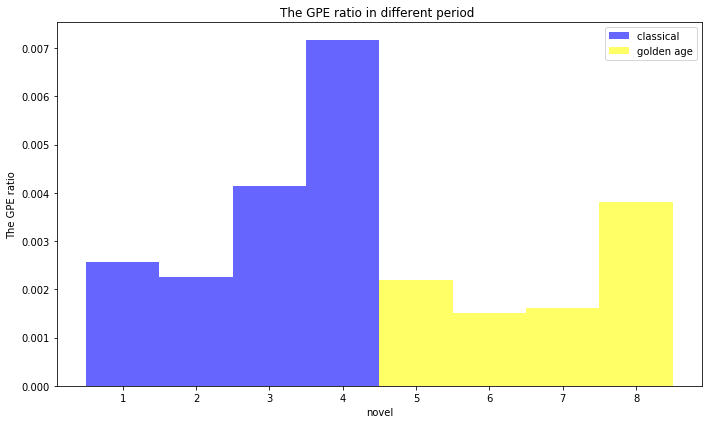

In [35]:
plt.bar(x1,gpe_ratio1,1, color="blue",alpha=0.6,label='classical ')  
plt.bar(x2,gpe_ratio2,1, color="yellow",alpha=0.6,label='golden age')  
plt.xlabel("novel")  #设置X轴Y轴名称  
plt.ylabel("The GPE ratio")  
plt.title("The GPE ratio in different period ")
plt.legend()
plt.tight_layout()
plt.show()

##### Analysis:

As it shown in the chart, The GPE ratios of the golden age detective novel are significantly higher than that of the early detective novel. It verified the hythposs. But,Why the writer prefer limited space and use less scene change? I need to further study it through close reading.

#### 4.2 Close Reading

_On this particular night our guests were Miss Gannett and Colonel Carter, who lives near the church. A good deal of gossip is handed round at these evenings, sometimes seriously interfering with the game in progress. We used to play bridge - chatty bridge of the worst description...We sat round the table. For some five minutes there was complete silence, owing to the fact that there is tremendous secret competition amongst us as to who can build their wall quickest._ (_The Murder Of Roger Ackroyd_ Agatha Christie 2865 )

The excerpt above describes a nomal Mah Jong party in the King's Abbot(a isolated village). People from all walks of life gather in a limited place reaonabley and exchange information with each other.  Agatha Christie the reveals the contradiction between the character and show some information and clues to promote the development of the plot through the party. Similar party sence is very common in the works of Agatha Christie. From the anlysis to the works of Agatha Christie's works, I think that the reason why the golden age detective story often fell into the limited space is as follow:
Firstly, Less scence change make the reader easy to understand the story. The plots in the detective is often very complex, so if differnt scenarios the happens in different place, it will make the reader comfused. Secondly, it make the plot more compact because the novel don't have to spend a lot words on introducing different places and why the character transport to another place. The compact plot make keep interest to the novel all the time.

In [36]:
second_list

['2The Pit Prop Syndicate.txt',
 '2The Three Coffins.txt',
 '2Murder Of Roger Ackroyd By Agatha Christie.txt',
 '2The Greek Coffin Mystery.txt']

### 5 Plot 
Hythposs:
- The golden age detective tends to show all the clues and information first without clear interpretation and reveal the truth through logical reasoning in the end, while the early detective novel often shows the clues and reasoning together.


#### 5.1 Find the narrative time of the clues


In [37]:
tokens1=tokenize(target_text1[1].lower())
tokens2=tokenize(target_text2[3].lower())

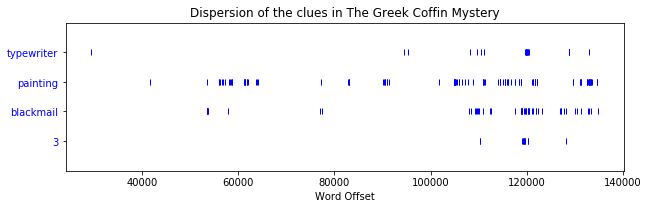

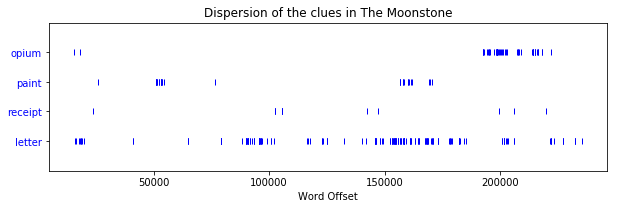

In [38]:
clues_words2=['typewriter','painting','blackmail','3']
text2=nltk.Text(tokens2)
plt.subplot(2,1,1)
nltk.draw.dispersion_plot(text2, clues_words2, 
                          title='Dispersion of the clues in The Greek Coffin Mystery')

clues_words1=['opium','paint','receipt','letter']
text1=nltk.Text(tokens1)
plt.subplot(2,1,2)
nltk.draw.dispersion_plot(text1, clues_words1,
                          title='Dispersion of the clues in The Moonstone')



##### Analysis:

The normal pattern of the detective novel is that the detective finds some clues and analyze the clues to reveal the truth. I think the first appearance of the clues means that the detective finds the clues. 
The high frequencies of clues mean that the detective is analyzing the clues. As it is shown in the first chart, all the clues are present to the reader before 12000 words, but they do not occur very frequently before 12000 words which means the writer only present the clues to the writer but do not interpret them. In about 12000 words, all the clues occur very frequently, which means that the detective starts to reveal the truth through these clues. However, in _the moonstone_, all the clues don't frequently occur together in the end.
The reason why the golden age detective novel put all the logical reasoning, in the end, is that the writer hopes the reader can investigate and reason with the detective. It looks like the writer pose a big problem for the reader by showing them all the clues and  reveal the results in the end.

## 6 Conclusion

- In the golden age, the reader can not satisfy only by the fancy story, so the writer pays more attention to build up vivid character.
- To make the plot compact, the golden age detective novel often in limited place and has less scene change.
- To invite readers to participate in the chase, the writer shows the clues without interpretation and reveal the truth in the end.

### Wordcount Function

Please replace `Yourname-Final.ipynb` with the filename of this notebook. For instance, if my name is Jonathan, and I've renamed this notebook to `Jonathan-Final.ipynb`, I'd change `filename = 'Yourname-Final.ipynb'` below to `filename = 'Jonathan-Final.ipynb`. 

In [39]:
filename = 'ZiyiWang-Final.ipynb'

if filename == 'Yourname-Final.ipynb': 
    raise ValueError("You forgot to change the filename above!")

with open(filename, encoding='utf-8') as f:
    nb = current.read(f, 'json')

wordCount = 0

for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        wordCount += len(cell['source'].replace('#', '').lstrip().split(' '))

# This is the word count of my instructions. 
# My instructions obviously don't count toward the final word count, 
tare = 533

wordCount = wordCount - tare

print("Total words: {}".format(wordCount))

if wordCount < 1000: 
    raise Warning('Your paper has not yet met the minimum required length.')
if wordCount > 2000: 
    raise Warning('Your paper has exceeded the maximum allowed length. Please edit for concision.')

Total words: 1697
